<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RS_gr1/blob/Kozlov-Alexey-folder/InspectrumClinic_gr1_akozlov_2023_05_08_15_01week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Рекомендательная система для профпатолога (INSPECTRUM CLINIC)**

Цель: 
Разработать прототип системы, реализующей функцию рекомендательной системы для врача профпатолога.

Алексей Козлов 2023.05.08-15 (1-я неделя):
исследование датасета, построение модели первой точности

**Загрузка необходимых библиотек**

In [1]:
# Загрузка файлов из облака
import gdown

# Библиотека для обработки и анализа данных
import pandas as pd

# Библиотека для работы с массивами данных
import numpy as np

# Библиотека для построения графиков
import matplotlib.pyplot as plt

# Библиотека для построения графиков
import seaborn as sns

In [2]:
# Загрузка файла датасета
url1 = 'https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%20%D0%BF%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3%20%D1%87%D0%B0%D1%81%D1%82%D1%8C.xlsx'
url2 = '/content/InspectrumClinic1.xlsx'
gdown.download(url1, url2, quiet=False)

Downloading...
From: https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%20%D0%BF%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3%20%D1%87%D0%B0%D1%81%D1%82%D1%8C.xlsx
To: /content/InspectrumClinic1.xlsx
100%|██████████| 32.4M/32.4M [00:02<00:00, 13.2MB/s]


'/content/InspectrumClinic1.xlsx'

In [3]:
# Чтение данных (df - DataFrame)
df = pd.read_excel(url2)

In [4]:
# Выведем три строки датасета на экран
df.head(3)

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,Оториноларингология3_Аудиометрия1_Значение,Оториноларингология3_Аудиометрия1_ЗначениеПредставление,Оториноларингология1_ЖалобыДополнение_Значение,Оториноларингология1_ЖалобыДополнение_ЗначениеПредставление,Стоматология2_ВП2_Значение,Стоматология2_ВП2_ЗначениеПредставление,Терапия2_ЗаключениеФОГК_Значение,Терапия2_ЗаключениеФОГК_ЗначениеПредставление,Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение,Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление
0,7f41ca7e-7dac-11ec-80fc-0cc47aab8067,c91e3407-b81f-11e9-80cf-0cc47aab8067,1976-10-24,Женский,Женский,2022-01-25,Периодический,Периодический,False,23c173a7-30d9-11e7-80d8-708bcd7f83cd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2ee1f9ac-83dd-11ec-80fc-0cc47aab8067,1a1a5fea-8b7f-11eb-80e8-0cc47aab8067,1987-11-18,Мужской,Мужской,2022-02-02,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9cbb191e-8e24-11ec-80fe-0cc47aab8067,7fe324e0-fa51-11eb-80f6-0cc47aab8067,1985-09-08,Мужской,Мужской,2022-02-15,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
**Шаг 1. Обработка и анализ данных**
---

---
**EDA (Exploratory data analysis) - Исследовательский анализ данных**

In [5]:
def print_row_col_count_df():
  # число строк датасета
  row_count = df.shape[0]
  # число колонок датасета
  col_count = df.shape[1]
  print('='*50)
  print('Оригинальная таблица данных (датасет):')
  print(f'  число строк: {row_count}')
  print(f'  число колонок: {col_count}')
  print('='*50)

In [6]:
print_row_col_count_df()

Оригинальная таблица данных (датасет):
  число строк: 1982
  число колонок: 4587


---
Основная задача EDA — выявить взаимосвязь между признаками и целевой переменной.
 
**"ЗаключениеМК" - целевая(зависимая) колонка №13 литера M**,
остальные 4586 колонок - независимые признаки.

---
Воспользуемся методом .info(), чтобы обобщенно посмотреть на наши данные.

In [7]:
# Выведем информацию о заполненности ячеек каждого признака
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Columns: 4587 entries, ДокументПрохождениеМедосмотра to Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление
dtypes: bool(1), datetime64[ns](43), float64(1253), object(3290)
memory usage: 69.3+ MB


In [8]:
# bool type columns
bool_cols = df.dtypes[df.dtypes == 'bool']
bool_cols_count = len(bool_cols)
print(f'Колоноки типа bool: {bool_cols_count}')
print('-'*50)
print(bool_cols)

Колоноки типа bool: 1
--------------------------------------------------
ПсихОсвидетельствование    bool
dtype: object


In [9]:
# datetime64[ns] type columns
datetime_cols = df.dtypes[df.dtypes == 'datetime64[ns]']
datetime_cols_count = len(datetime_cols)
print(f'Колоноки типа datetime: {datetime_cols_count}')
print('-'*50)
print(datetime_cols)

Колоноки типа datetime: 43
--------------------------------------------------
КлиентДатаРождения                                        datetime64[ns]
ДатаЗавершенияМедосмотра                                  datetime64[ns]
ЛабораторныеИсследования1_ДатаПриема                      datetime64[ns]
Рентгенология1_ДатаПриема                                 datetime64[ns]
Рентгенология2_ДатаПриема                                 datetime64[ns]
ПсихиатрияНаркология1_ДатаПриема                          datetime64[ns]
Офтальмология1_ДатаПриема                                 datetime64[ns]
Оториноларингология1_ДатаПриема                           datetime64[ns]
ХирургНеИсп1_ДатаПриема                                   datetime64[ns]
Гинекология1_ДатаПриема                                   datetime64[ns]
ФункциональнаяДиагностика1_ДатаПриема                     datetime64[ns]
Стоматология1_ДатаПриема                                  datetime64[ns]
Эндоскопия1_ДатаПриема                        

In [10]:
# float64 type columns
float_cols = df.dtypes[df.dtypes == 'float64']
float_cols_count = len(float_cols)
print(f'Колоноки типа float: {float_cols_count}')
print('-'*50)
print(float_cols)

Колоноки типа float: 1253
--------------------------------------------------
ЛабораторныеИсследования1_ХР_Рекомендация2Представление    float64
ЛабораторныеИсследования1_ХР_РекомендацияСтр               float64
Рентгенология1_ХР_Рекомендация1                            float64
Рентгенология1_ХР_Рекомендация1Представление               float64
Рентгенология1_ХР_Рекомендация2                            float64
                                                            ...   
Оториноларингология3_Классификация2Представление1          float64
Оториноларингология3_Классификация31                       float64
Оториноларингология3_Классификация3Представление1          float64
Оториноларингология3_Противопоказание1                     float64
Оториноларингология3_ПротивопоказаниеПредставление1        float64
Length: 1253, dtype: object


In [11]:
# object-string type columns
obj_cols = df.dtypes[df.dtypes == 'O']
obj_cols_count = len(obj_cols)
print(f'Колоноки типа object: {obj_cols_count}')
print('-'*50)
print(obj_cols)

Колоноки типа object: 3290
--------------------------------------------------
ДокументПрохождениеМедосмотра                                             object
Клиент                                                                    object
КлиентПол                                                                 object
КлиентПолПредставление                                                    object
ТипМедосмотра                                                             object
                                                                           ...  
Стоматология2_ВП2_ЗначениеПредставление                                   object
Терапия2_ЗаключениеФОГК_Значение                                          object
Терапия2_ЗаключениеФОГК_ЗначениеПредставление                             object
Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение                 object
Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление    object
Length: 3290, dtype: object


In [12]:
# общее число колонок
total_cols_count = bool_cols_count + datetime_cols_count + float_cols_count + obj_cols_count
print('Число колонок:')
print(f'  bool: {bool_cols_count}')
print(f'  datetime64[ns]: {datetime_cols_count}')
print(f'  float64: {float_cols_count}')
print(f'  object-string: {obj_cols_count}')
print('-'*50)
print(f'Общее число колонок: {total_cols_count}')

Число колонок:
  bool: 1
  datetime64[ns]: 43
  float64: 1253
  object-string: 3290
--------------------------------------------------
Общее число колонок: 4587


In [13]:
# названия колонок
col_names = list(df.columns)
col_names_count = len(col_names)
print(f'Число названий колонок: {col_names_count}')
print('-'*50)
print(col_names)

Число названий колонок: 4587
--------------------------------------------------
['ДокументПрохождениеМедосмотра', 'Клиент', 'КлиентДатаРождения', 'КлиентПол', 'КлиентПолПредставление', 'ДатаЗавершенияМедосмотра', 'ТипМедосмотра', 'ТипМедосмотраПредставление', 'ПсихОсвидетельствование', 'Контрагент', 'Цех', 'Профессия', 'ЗаключениеМК', 'ЗаключениеМКПредставление', 'Заключение', 'ДиспансернаяГруппа', 'ДиспансернаяГруппаПредставление', 'ВредныеФакторы', 'ЛабораторныеИсследования1_ДокументПрием', 'ЛабораторныеИсследования1_ДатаПриема', 'ЛабораторныеИсследования1_Салон', 'ЛабораторныеИсследования1_СалонПредставление', 'ЛабораторныеИсследования1_Специализация', 'ЛабораторныеИсследования1_СпециализацияПредставление', 'ЛабораторныеИсследования1_ХР_Рекомендация1', 'ЛабораторныеИсследования1_ХР_Рекомендация1Представление', 'ЛабораторныеИсследования1_ХР_Рекомендация2', 'ЛабораторныеИсследования1_ХР_Рекомендация2Представление', 'ЛабораторныеИсследования1_ХР_РекомендацияСтр', 'ЛабораторныеИсследова

In [14]:
print('Columns info:')
print('-'*50)
# inx = 0
# coumn index, name, type: DataFrame
cint_df = pd.DataFrame({'name': [], 'type': []})
for col in df.columns:
  #print(f'index: {inx}, column-name: {col}, column-type: {df[col].dtype}')
  #add new row to end of DataFrame
  cint_df.loc[ len(cint_df.index )] = [col, df[col].dtype]
  #inx += 1
  # if (inx > 10):
  #   break

#print('='*50)
cint_df.head(3)
#cint_df

Columns info:
--------------------------------------------------


,name,type
0,ДокументПрохождениеМедосмотра,object
1,Клиент,object
2,КлиентДатаРождения,datetime64[ns]


---
**Определяем признаки(колонки) с пропусками.**

In [15]:
# выявим пропущенные значения с помощью .isnull() и посчитаем их количество через sum()
df.isnull().sum()

ДокументПрохождениеМедосмотра                                                0
Клиент                                                                       0
КлиентДатаРождения                                                           0
КлиентПол                                                                    0
КлиентПолПредставление                                                       0
                                                                          ... 
Стоматология2_ВП2_ЗначениеПредставление                                   1981
Терапия2_ЗаключениеФОГК_Значение                                          1981
Терапия2_ЗаключениеФОГК_ЗначениеПредставление                             1981
Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение                 1981
Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление    1981
Length: 4587, dtype: int64

In [16]:
# Поиск признаков с пропусками
null_cols = df.columns[df.isna().any()].tolist()
null_cols_len = len(null_cols)
print(f'Колоноки с пропусками: {null_cols_len}')
print('-'*50)

for i in range(null_cols_len):
  if 'ЗаключениеМК' == null_cols[i]:
    print(f'null_cols[{i}]: {null_cols[i]}')
    break

print('='*50)
print(f'завершена проверка целевой колонки на пустые значения')

Колоноки с пропусками: 4575
--------------------------------------------------
null_cols[1]: ЗаключениеМК
завершена проверка целевой колонки на пустые значения


Колонки с пропусками: 4575.

Наша 13-ая целевая колонка "ЗаключениеМК" имеет пропуски, 
поэтому удаляем из нашего датасета строки, в которых отсутствует значение целевого параметра.

Также проанализируем целевую колонку на уникальные значения.

In [17]:
unique_names = df['ЗаключениеМК'].unique().tolist()
print(unique_names)

['Годен', 'ГоденСКоррекциейЗрения', 'ГоденБезРаботНаВысотах', 'НуждаетсяВДообследованииИЛечении', 'ВременноНегоден', 'ОграниченноГоден', nan, 'машинист бульдозера', 'Газоспасатель', ' Газоспасатель']


**Анализ уникальных значений целевой колонки показал, что возможны следующие значения:**

-'Годен',

-'ГоденСКоррекциейЗрения',

-'ГоденБезРаботНаВысотах',

-'НуждаетсяВДообследованииИЛечении',

-'ВременноНегоден',

-'ОграниченноГоден'

**Также есть строки с пропусками и очевидными ошибками, удаляем эти строки из датасета, чтобы не вносить ошибку в обучение модели:**

-nan,

-'машинист бульдозера',

-'Газоспасатель',

-' Газоспасатель'

In [18]:
# удаляем nan, 'машинист бульдозера', 'Газоспасатель', ' Газоспасатель'
df = df.drop(df[(df['ЗаключениеМК'].isnull()) | (df['ЗаключениеМК'] == 'машинист бульдозера') | (df['ЗаключениеМК'] == 'Газоспасатель') | (df['ЗаключениеМК'] == ' Газоспасатель') ].index)

In [19]:
#проверяем список уникальных значений
unique_names2 = df['ЗаключениеМК'].unique().tolist()
print(unique_names2)

['Годен', 'ГоденСКоррекциейЗрения', 'ГоденБезРаботНаВысотах', 'НуждаетсяВДообследованииИЛечении', 'ВременноНегоден', 'ОграниченноГоден']


In [20]:
print_row_col_count_df()

Оригинальная таблица данных (датасет):
  число строк: 1571
  число колонок: 4587


**Количество строк в датасете уменьшили с 1982 до 1571.**

---
**Найдем признаки с пропусками.**

Если количество пропусков в признаке больше 50%, то удалим весь столбец признака. Если не более 50%, то пропуски заменим на среднее значение в случае численного признака и на наиболее часто встречаемое значение в случае категориального.

In [21]:
# Удаление столбцов с пропусками, если количество пропусков в признаке больше 50%
null_cols2 = df.columns[df.isna().any()].tolist()
for col2 in null_cols2:
  if df[col2].isna().sum() > 0.5*len(df):
    df = df.drop(col2, axis=1)

print(df.shape)
print_row_col_count_df()

(1571, 419)
Оригинальная таблица данных (датасет):
  число строк: 1571
  число колонок: 419


**Количество колонок в датасете уменьшили с 4587 до 419.**

In [22]:
# список колонок после удаления
col_names2 = list(df.columns)
print(col_names2)

['ДокументПрохождениеМедосмотра', 'Клиент', 'КлиентДатаРождения', 'КлиентПол', 'КлиентПолПредставление', 'ДатаЗавершенияМедосмотра', 'ТипМедосмотра', 'ТипМедосмотраПредставление', 'ПсихОсвидетельствование', 'Контрагент', 'Профессия', 'ЗаключениеМК', 'ЗаключениеМКПредставление', 'Заключение', 'ДиспансернаяГруппа', 'ДиспансернаяГруппаПредставление', 'ВредныеФакторы', 'ЛабораторныеИсследования1_ДокументПрием', 'ЛабораторныеИсследования1_ДатаПриема', 'ЛабораторныеИсследования1_Салон', 'ЛабораторныеИсследования1_СалонПредставление', 'ЛабораторныеИсследования1_Специализация', 'ЛабораторныеИсследования1_СпециализацияПредставление', 'ЛабораторныеИсследования1_ОАК_Значение', 'ЛабораторныеИсследования1_ОАК_ЗначениеПредставление', 'ЛабораторныеИсследования1_Биохимия_Значение', 'ЛабораторныеИсследования1_Биохимия_ЗначениеПредставление', 'ЛабораторныеИсследования1_ОАМ_Значение', 'ЛабораторныеИсследования1_ОАМ_ЗначениеПредставление', 'ЛабораторныеИсследования1_МазокИзЗеваИНоса_Значение', 'Лабораторн

**Номер колонки 'ЗаключениеМК' не изменилось осталось с индексом 13.**

In [23]:
# Заново выведем информацию о заполненности ячеек каждого признака
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1981
Columns: 419 entries, ДокументПрохождениеМедосмотра to Терапия1_Диагноз_ЗначениеПредставление
dtypes: bool(1), datetime64[ns](10), float64(36), object(372)
memory usage: 5.0+ MB


In [24]:
# Если пропусков менее 50%, то заменим их на среднее значение в случае численного признака и на наиболее часто встречаемое значение в случае категориального.
# Пройдём циклом по всем колонкам
for i in df.columns:
  # условие, если количество пустых ячеек не 0, но и не более 50%
  if df[i].isna().sum() > 0:
    # Если тип значений столбца 'object' (строковые)
    if df[i].dtype == 'object':
      # То заполняем пустые значения самым частовстречаемым значением этого столбца
      df[i].fillna(df[i].value_counts().index[0], inplace=True)
      # Если тип значений столбца НЕ 'object' (значит численные)
    elif df[i].dtype != 'object':
      # То заполняем пустые значения средним значением
      df[i].fillna(df[i].mean(), inplace=True)

In [25]:
# Заново выведем информацию о заполненности ячеек каждого признака
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1981
Columns: 419 entries, ДокументПрохождениеМедосмотра to Терапия1_Диагноз_ЗначениеПредставление
dtypes: bool(1), datetime64[ns](10), float64(36), object(372)
memory usage: 5.0+ MB


In [26]:
# Поиск признаков с пропусками
null_cols3 = df.columns[df.isna().any()].tolist()
null_cols_len3 = len(null_cols3)
print(f'Список колонок с пропусками: {null_cols_len3}')

Список колонок с пропусками: 0


---
**Итак, добились того что наш датасет полностью заполнен, пропуски отсутсвуют.**

---
**Категориальные переменные**
---


Теперь нужно поработать с категориальными переменными (categorical variable). Модель не сможет подобрать веса, если значения выражены словами (например, 'Годен', 'ГоденСКоррекциейЗрения', 'ГоденБезРаботНаВысотах', 'НуждаетсяВДообследованииИЛечении', 'ВременноНегоден', 'ОграниченноГоден' в переменной-колонке 'ЗаключениеМК').
Поэтому к переменной нужно применить one-hot encoding.

In [27]:
# применим one-hot encoding к переменной 'ЗаключениеМК' с помощью метода .get_dummies()
pd.get_dummies(df['ЗаключениеМК']).head(3)

,ВременноНегоден,Годен,ГоденБезРаботНаВысотах,ГоденСКоррекциейЗрения,НуждаетсяВДообследованииИЛечении,ОграниченноГоден
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0


In [28]:
# категориальная колонка 'ЗаключениеМК'
conclusion1 = df['ЗаключениеМК']
# print(conclusion1)
unique_names1 = df['ЗаключениеМК'].unique().tolist()
print(unique_names1)
unique_names1.sort()
print(unique_names1)

conclusion2 = []
for cval1 in conclusion1:
  inx1 = unique_names1.index(cval1)
  #print(f'cval1: {cval1}, inx1: {inx1}')
  conclusion2.append(inx1)

print(conclusion2)

['Годен', 'ГоденСКоррекциейЗрения', 'ГоденБезРаботНаВысотах', 'НуждаетсяВДообследованииИЛечении', 'ВременноНегоден', 'ОграниченноГоден']
['ВременноНегоден', 'Годен', 'ГоденБезРаботНаВысотах', 'ГоденСКоррекциейЗрения', 'НуждаетсяВДообследованииИЛечении', 'ОграниченноГоден']
[1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,

---
**Значения 'ЗаключениеМК' очень сильно разбалансированы.**
---

Присоединим новые (закодированные) переменные к исходному датафрейму df. Для этого используем функцию .concat().

In [29]:
df["conclusion"] = conclusion2

In [30]:
# для выбора нескольких значений типа float
# обновим список
# float64 type columns
#float_colsN = df.dtypes[df.dtypes == 'float64']
#float_colsN_count = len(float_colsN)
#print(f'Колоноки типа float: {float_colsN_count}')
#print('-'*50)
#print(float_colsN)

In [31]:
# colC1 = df['conclusion']
# print(colC1)

In [32]:
colF1 = df['Терапия1_АртериальноеДавление21_Значение']
print(colF1)

0       80.594457
1       80.594457
2       80.594457
3       80.594457
4       80.594457
          ...    
1961    70.000000
1962    70.000000
1972    80.000000
1973    71.000000
1981    80.000000
Name: Терапия1_АртериальноеДавление21_Значение, Length: 1571, dtype: float64


In [33]:
colF2 = df['Офтальмология1_СосудыСреднегоКалибра_Значение']
print(colF2)

0       0.052104
1       0.052104
2       0.052104
3       0.052104
4       0.052104
          ...   
1961    0.000000
1962    0.052104
1972    0.000000
1973    0.000000
1981    0.052104
Name: Офтальмология1_СосудыСреднегоКалибра_Значение, Length: 1571, dtype: float64


Построим несколько графиков в зависимости от признаков float:

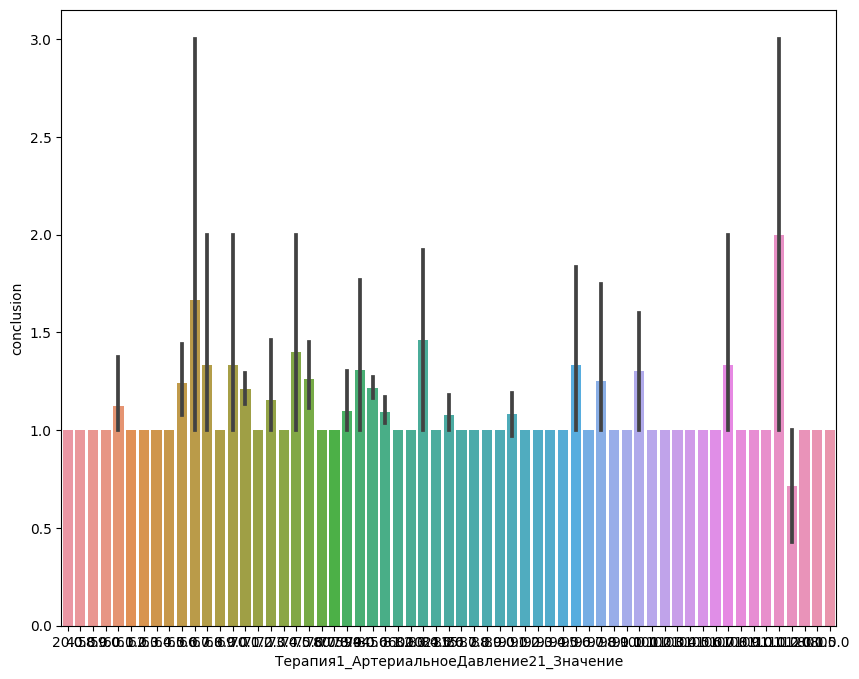

In [34]:
# Задаем размер полотна
plt.figure(figsize=(10,8))
# Строим график barplot
sns.barplot(x="Терапия1_АртериальноеДавление21_Значение",
            y="conclusion",
            data=df)
plt.show()

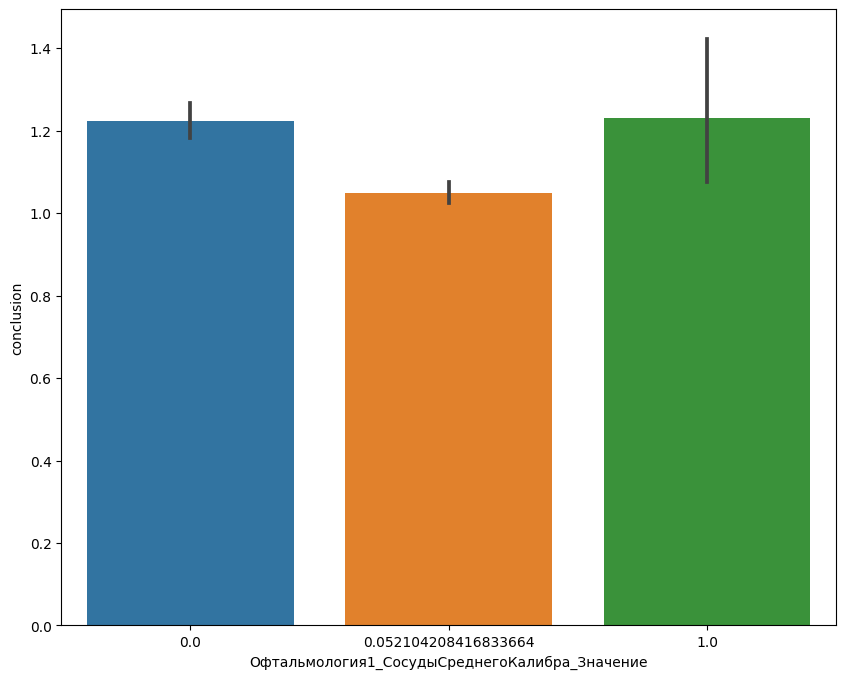

In [35]:
plt.figure(figsize=(10,8))
# Строим график barplot
sns.barplot(x="Офтальмология1_СосудыСреднегоКалибра_Значение",
            y="conclusion",
            data=df)
plt.show()

---
**TODO**
---

**необходимо отоборать признаки с помощью графиков и матриц корреляции, затем произвести нормализацию**
---


---
**Шаг 2. Разделение обучающей выборки (train) на признаки (X_train) и целевую переменной (y_train)**
---

In [37]:
# TODO
# для первой итерации скопирую только одну колонку
# затем необходимо будет добавить все остальные выбранные отнормированные колонки и т.д.
#
x_train = df['Терапия1_АртериальноеДавление21_Значение']
x_train.head(3)

0    80.594457
1    80.594457
2    80.594457
Name: Терапия1_АртериальноеДавление21_Значение, dtype: float64

In [38]:
# столбец 'ЗаключениеМК' станет нашей целевой переменной (y_train)
# применим one-hot encoding к переменной 'ЗаключениеМК' с помощью метода .get_dummies()
y_train = pd.get_dummies(df['ЗаключениеМК'])
y_train.head(3)

,ВременноНегоден,Годен,ГоденБезРаботНаВысотах,ГоденСКоррекциейЗрения,НуждаетсяВДообследованииИЛечении,ОграниченноГоден
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0


---
**Шаг 3. Обучение модели логистической регрессии**
---

Воспользуемся моделью логистической регрессии из библиотеки sklearn и передадим ей обучающую выборку.

In [40]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression
 
# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()
 
# обучим нашу модель
#model.fit(x_train, y_train)

Остается сделать прогноз и оценить качество модели. При этом обратим внимание, что в тестовых данных отсутствует целевая переменная, поэтому чтобы иметь хоть какое-то представление о качестве модели, нам необходимо вначале использовать обучающую выборку для построения прогноза.

In [42]:
# сделаем предсказание класса на обучающей выборке
#y_pred_train = model.predict(x_train)

Теперь мы можем сравнить прогнозные значения с фактическими. Построим матрицу ошибок (confusion matrix).

In [43]:
# # построим матрицу ошибок
# from sklearn.metrics import confusion_matrix
 
# # передадим ей фактические и прогнозные значения
# conf_matrix = confusion_matrix(y_train, y_pred_train)
 
# # преобразуем в датафрейм
# conf_matrix_df = pd.DataFrame(conf_matrix)
# conf_matrix_df

---
**Шаг 4. Подготовка тестовые данные (x_test) и построение прогноза**
---